# Data Visualisation

In [26]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import sqlite3

In [27]:
db_connection = sqlite3.connect("../database/clean_data.db")
cursor = db_connection.cursor()

In [28]:
df = pd.read_sql_query('SELECT * FROM proposals_on_chain',db_connection)
df[['total_num_proposals', 'total_num_voters', 'proposal_creators', 'total_num_votes']] = df[['total_num_proposals', 'total_num_voters', 'proposal_creators', 'total_num_votes']].astype(int)



In [29]:
df_treasury = pd.read_sql_query('SELECT * FROM treasury',db_connection)

In [30]:

d = {"k": '*1000', "M": '*1000000', "B": '*1000000000'}

s_convert = df_treasury.treasury_aum_usd.replace(d, regex=True).map(pd.eval)
df_treasury['treasury_aum_usd'] = s_convert

In [31]:
df_merge = pd.merge(df, df_treasury, on='dao')

In [32]:
df_merge

,dao,total_num_proposals,total_num_voters,proposal_creators,total_num_votes,avg_votes_per_proposal,participation_rates,success_rate,treasury_aum_usd,token_name_1,...,token_percent_1,token_percent_2,token_percent_3,token_percent_4,token_percent_5,token_balance_1,token_balance_2,token_balance_3,token_balance_4,token_balance_5
0,Uniswap,102,12838,55,731,74599,3.3,46.1,23000000000,UNI,...,99.9,0.1,0.0,0.0,0.0,"422,513,297.0",22.4,150.0,4.3,0.0
1,BitDAO,21,294,12,34,728,1.3,9.5,17000000000,BIT,...,55.4,19.3,14.3,10.5,0.3,"3,133,346,618.2","269,946.6","237,737,271.4","173,912,371.0","3,362,316.0"
2,ENS,47,86997,5,2300,108136,51.9,21.3,1000000000,ENS,...,95.3,4.5,0.2,0.0,0.0,"71,667,301.9","38,378.0","2,469,712.3",17.6,"4,397.4"
3,Gnosis,65,4845,38,481,31329,21.7,20.0,625000000,GNO,...,98.8,0.3,0.3,0.2,0.1,"7,421,460.4","1,407.3","1,377.0","4,472.8",519.0
4,OlympusDAO,229,9090,126,210,48166,51.6,18.8,2044000000,DAI,...,49.3,16.2,13.9,7.0,6.9,"100,657,419.6","33,146,299.6","1,730,521.9","142,149.0","4,840,143.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Governor DAO,65,128,4,6,406,6.0,66.2,119000,UNI-V2,...,77.9,12.6,7.3,2.0,0.2,302.6,"1,500.0","8,333.0",238.5,0.0
195,RatAlert,3,11,2,6,20,22.9,0.0,116000,MATIC,...,98.0,0.9,0.7,0.4,0.0,"13,213.6","6,357.1","1,000.0","2,028.3",553.0
196,MarsDao,219,11,2,0,133,15.1,73.5,104000,ETH,...,55.3,34.1,5.2,2.5,1.5,4.9,"3,552.8","150,000.0",46.5,130.5
197,HausDAO,57,8,44,0,53,17.8,80.7,101000,DAI,...,100.0,0.0,NaN,NaN,NaN,"10,126.0",96.9,718.0,None,None


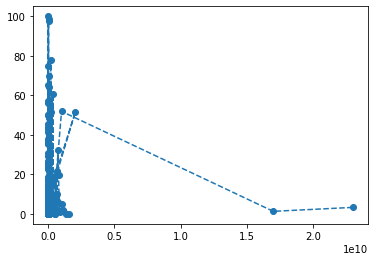

In [33]:
plt.scatter(df_merge["treasury_aum_usd"], df_merge["participation_rates"], marker="o")
plt.plot(df_merge["treasury_aum_usd"], df_merge["participation_rates"], linestyle="dashed")

# Show the plot
plt.show()

In [36]:
print(df_merge['treasury_aum_usd'].corr(df_merge['participation_rates']))

total_num_proposals    0.001814
total_num_voters       0.060780
proposal_creators      0.005744
total_num_votes        0.184882
participation_rates   -0.078398
success_rate          -0.023589
treasury_aum_usd       1.000000
token_percent_1       -0.001562
token_percent_2       -0.036819
token_percent_3        0.033946
token_percent_4        0.078736
token_percent_5       -0.054158
dtype: float64
